# Predicting vigilance using machine learning
## Random forest building
Rosalie Lucas (6540384)


In [7]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score


# Installed Graphviz using Pip3

In [8]:
PATH = '/Users/roos/Developer/Bachelor-Thesis'

In [9]:
data_file_path = '/Users/roos/Data/test_data.csv'
data_file = pd.read_csv(data_file_path)

for column in data_file:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_file[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_file.isnull().sum())

The number of values for feature 0 : 2500
The number of values for feature 1 : 2500
The number of values for feature 2 : 2500
The number of values for feature 3 : 2500
The number of values for feature 4 : 2500
The number of values for feature 5 : 2500
The number of values for feature 6 : 2500
The number of values for feature 7 : 2500
The number of values for feature 8 : 2500
The number of values for feature 9 : 2500
The number of values for feature 10 : 2 -- [0. 1.]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


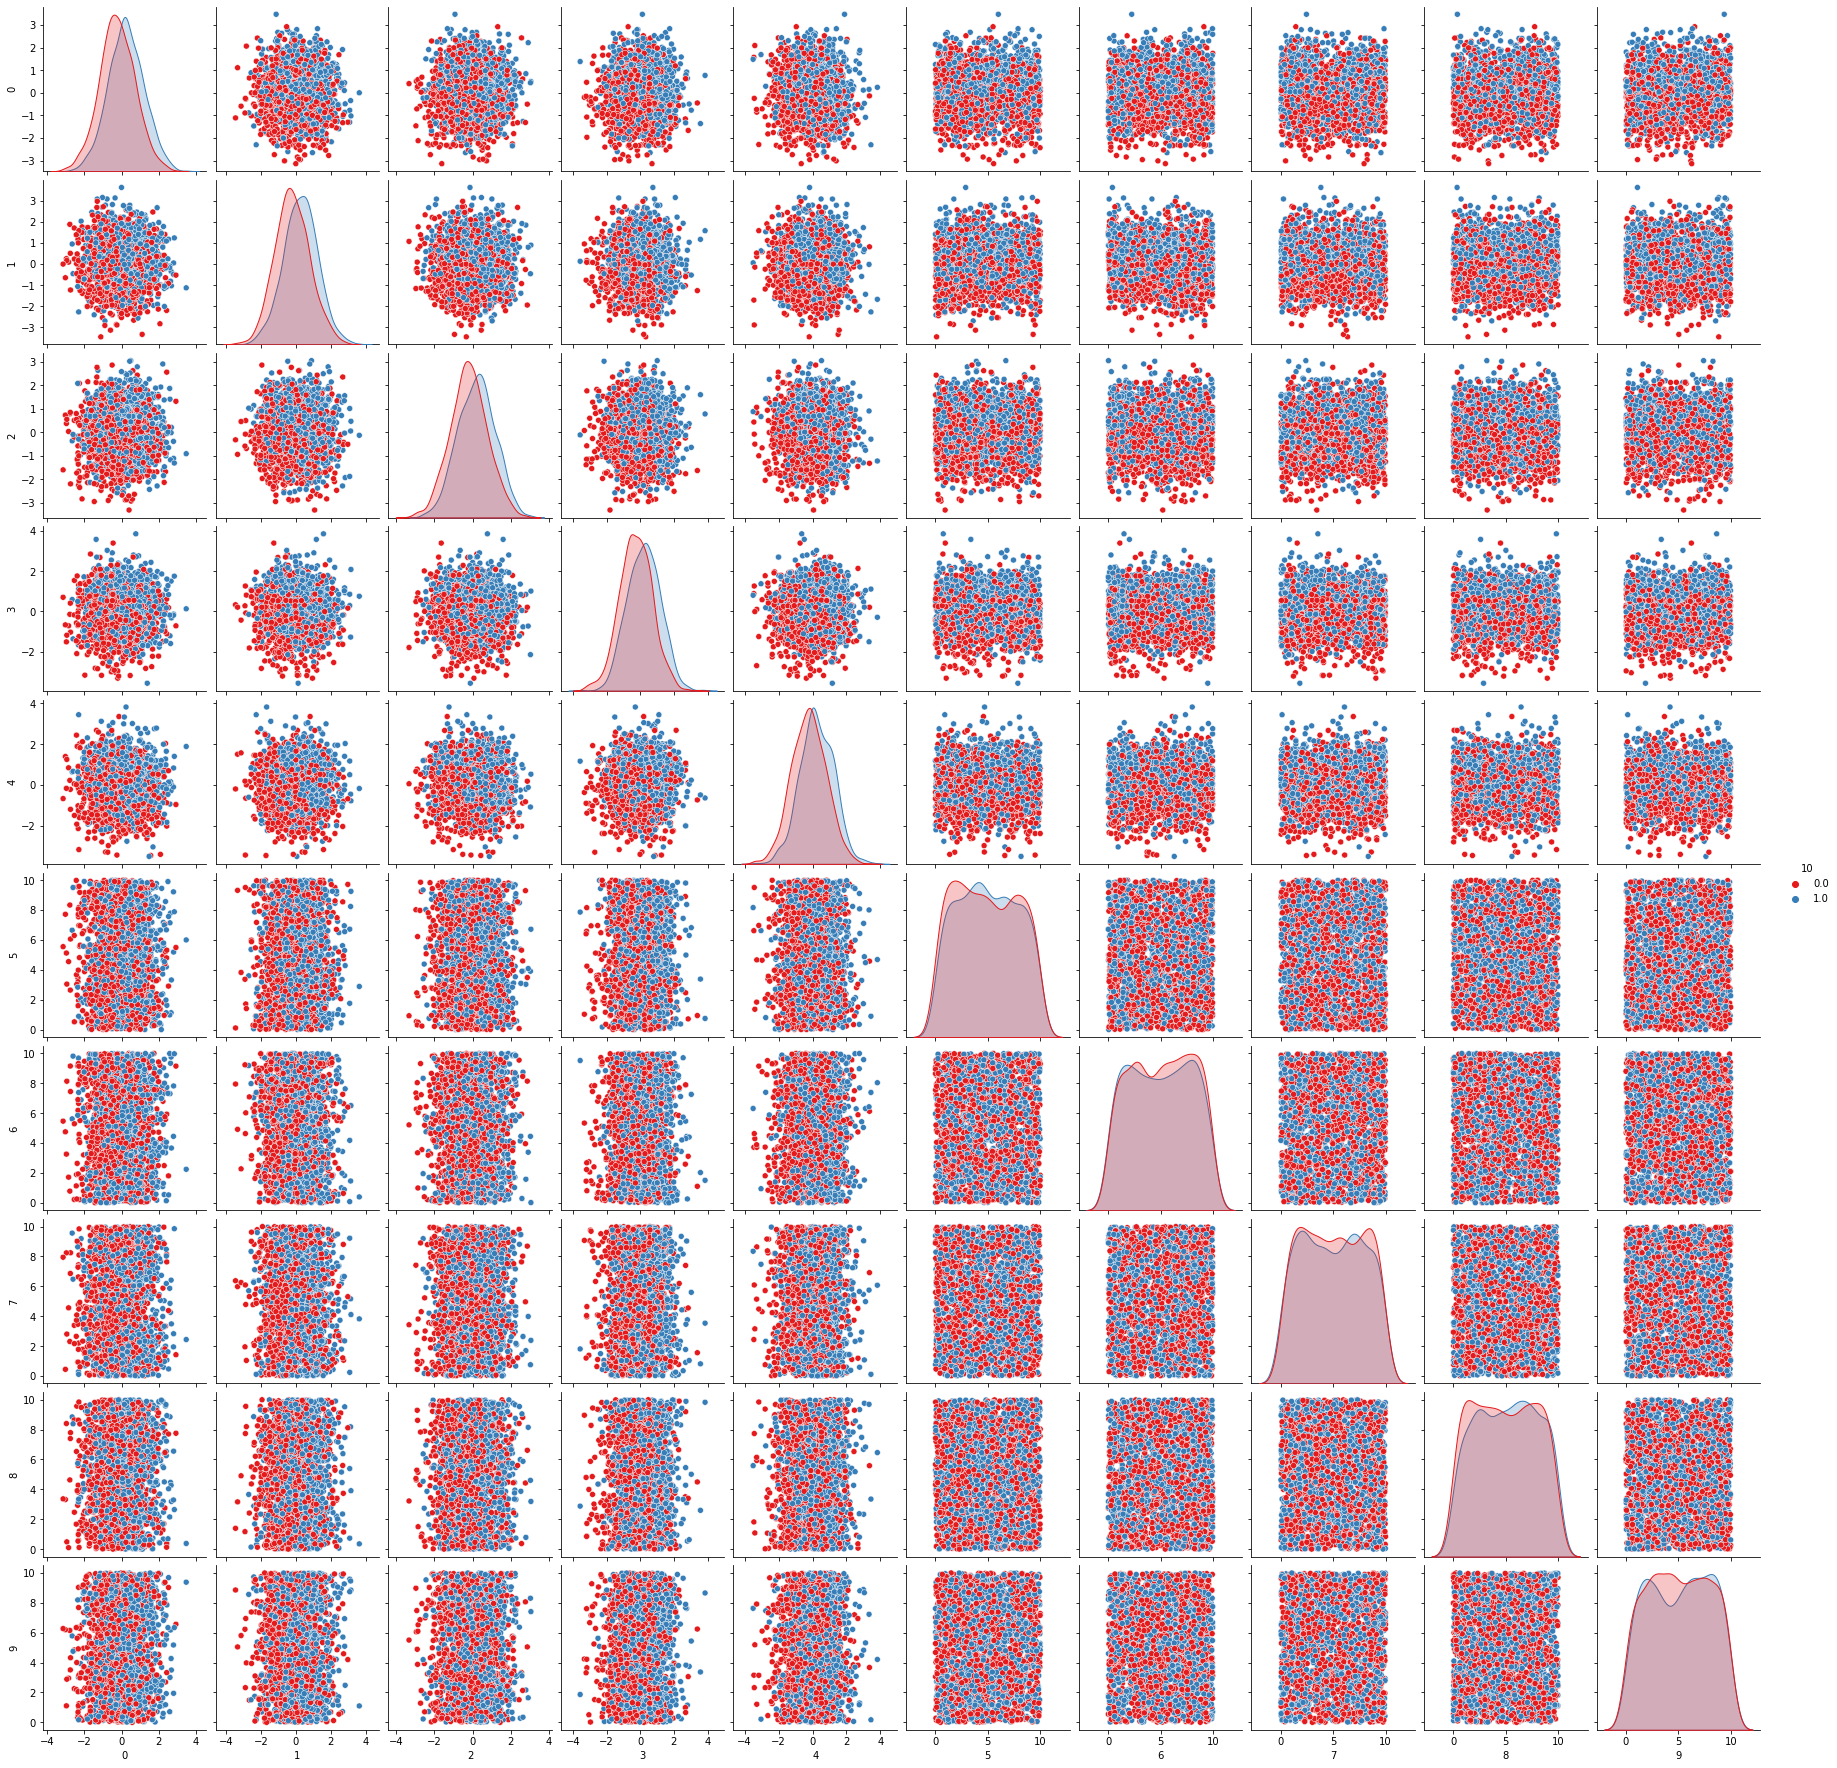

In [10]:
plot = sns.pairplot(data_file, hue='10', palette="Set1")

In [11]:
# Splitting the data
X = data_file.drop('10', axis=1).values
Y = data_file['10'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (2500, 10)
Y shape: (2500,)


In [12]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

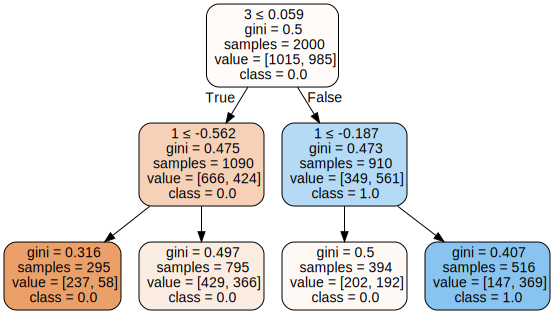

In [13]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_file.drop('10', axis=1).columns,
                                   class_names=data_file['10'].unique().astype(str),
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [14]:
final = ''
fi = ''
for i, column in enumerate(data_file.drop('10', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature 0:, 0.000
Importance of feature 1:, 0.509
Importance of feature 2:, 0.000
Importance of feature 3:, 0.491
Importance of feature 4:, 0.000
Importance of feature 5:, 0.000
Importance of feature 6:, 0.000
Importance of feature 7:, 0.000
Importance of feature 8:, 0.000
Importance of feature 9:, 0.000


index Variable  Feature Importance Score
0      1        1                  0.508583
1      3        3                  0.491417
2      0        0                  0.000000
3      2        2                  0.000000
4      4        4                  0.000000
5      5        5                  0.000000
6      6        6                  0.000000
7      7        7                  0.000000
8      8        8                  0.000000
9      9        9                  0.000000

In [15]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.6185
Testing Accuracy is:  0.596


In [16]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.706


In [17]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_file.drop('10', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2


Importance of feature 0:, 0.128
Importance of feature 1:, 0.131
Importance of feature 2:, 0.116
Importance of feature 3:, 0.130
Importance of feature 4:, 0.129
Importance of feature 5:, 0.072
Importance of feature 6:, 0.074
Importance of feature 7:, 0.068
Importance of feature 8:, 0.075
Importance of feature 9:, 0.076


index Variable  Feature Importance Score
0      1        1                  0.131090
1      3        3                  0.129741
2      4        4                  0.129143
3      0        0                  0.127818
4      2        2                  0.116380
5      9        9                  0.076145
6      8        8                  0.075368
7      6        6                  0.073559
8      5        5                  0.072331
9      7        7                  0.068425